In [1]:
pip install pandas numpy scikit-learn tensorflow matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: C:\Users\Usuário\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2125
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0496 
Epoch 3/10


C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0580
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0382 
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0276 
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0239 
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0105 
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0108 
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0188     
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0136 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


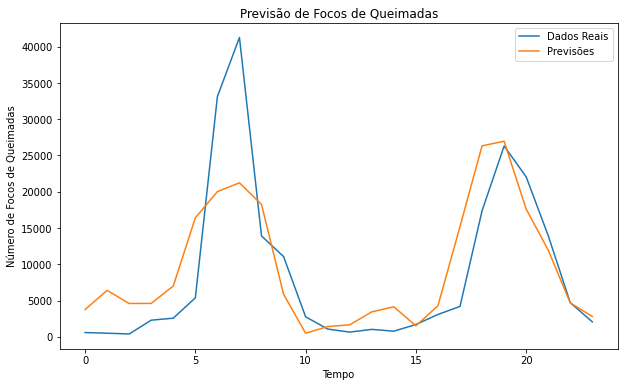

In [2]:
# Importações necessárias
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt

# Carregar os dados
data_path = 'C:\\Users\\Usuário\\Downloads\\queimadas.csv'
queimadas_df = pd.read_csv(data_path, encoding='ISO-8859-1', sep=';')

# Agregar os dados por data para obter o total de focos de queimadas por mês
data_aggregated = queimadas_df.groupby('date')['focuses'].sum().reset_index()

# Converter a coluna 'date' para datetime e ordenar
data_aggregated['date'] = pd.to_datetime(data_aggregated['date'], format='%Y/%m')
data_aggregated = data_aggregated.sort_values('date')

# Isolar a série de focos de queimadas
focuses_series = data_aggregated['focuses'].values.reshape(-1, 1)

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
focuses_normalized = scaler.fit_transform(focuses_series)

# Preparar os dados para o modelo
window_size = 12
forecast_horizon = 24
train_data = focuses_normalized[:-forecast_horizon]
test_data = focuses_normalized[-(window_size + forecast_horizon):]

train_generator = TimeseriesGenerator(train_data, train_data, length=window_size, batch_size=1)
test_generator = TimeseriesGenerator(test_data, test_data, length=window_size, batch_size=1)

# Definir o modelo
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(train_generator, epochs=10)

# Fazer previsões
predictions = model.predict(test_generator)
predicted_counts = scaler.inverse_transform(predictions)

# Extrair os valores reais dos últimos 24 meses
actual_counts = scaler.inverse_transform(test_data[window_size:])

# Plotar as previsões contra os valores reais
plt.figure(figsize=(10, 6))
plt.plot(actual_counts, label='Dados Reais')
plt.plot(predicted_counts, label='Previsões')
plt.title('Previsão de Focos de Queimadas')
plt.xlabel('Tempo')
plt.ylabel('Número de Focos de Queimadas')
plt.legend()
plt.show()
